# New Section

In [1]:

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import os
import time
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [5]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("ulm*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
     label                                               text  is_valid
0       ij  None বছর কয়েক হল সাদিয়া আর আশরাফ সুন্দরবনের বই...     False
1       fe  আমাদের জীবনচিত্রে যুদ্ধাপরাধীদের ছায়া আমাদের জ...     False
2       mk  নির্ভীক নেতৃত্বই উন্নয়নের সোপান ২৬ জুলাই (২০১৪...     False
3       rg  গ্রিসের স্ট্রবেরি খামারে বাংলাদেশিদের উপর গুলি...     False
4       ij  গল্প_ পাখিপুর সকালবেলায় চা শেষ করে একটা সিগারে...     False
...    ...                                                ...       ...
2095    rn  রহস্যময় বিতর্কিত পুরুষ রাসপুতিন ইতিহাস কি শুধু...     False
2096    fe  রাজনৈতিক মূর্খতা ও মুক্তিযুদ্ধের মৌলিক ফসল রাজ...     False
2097    mk  ইউপি ইলেকশন এবং ___ বাংলাদেশের তিন স্তরবিশিষ্ট...     False
2098    rn  মনে করি, A হলো একটি সফল জীবন। A=x+y+z, এখানে x...     False
2099    fe  বহির্বিশ্বে বাংলা সাহিত্য-সংস্কৃতির বীজ ও বীক্...     False

[2100 rows x 3 columns]


In [6]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [ ]:
#data = pd.read_csv('Data_samitdata.csv').apply(lambda x: x.astype(str).str.lower())

In [7]:
data.drop_duplicates(keep=False, inplace=True)

In [8]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
     |████████████████████████████████| 23.9 MB 21.0 MB/s 
     |████████████████████████████████| 965 kB 69.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [9]:
X = data ['text'].values

In [10]:
Y= pd.get_dummies(data['label'].values)

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,random_state=42) # this is random splitting

In [11]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.1,random_state=42) # this is random splitting

In [12]:
#from nltk.tokenize import word_tokenize
#import nltk
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

def create_corpus(df):
    corpus = []  
    for text in X_train:
        words = [word.lower() for word in bnltk.word_tokenize(text)]
        #words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus    

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
#import nltk
#nltk.download('punkt')
corpus = create_corpus(X_train)

In [14]:
corpus[0]

['আর',
 'কতো',
 'লাশ',
 'চাই',
 'খালেদার_',
 'অবরোধে',
 'সহিংসতার',
 'শিকার',
 'হওয়ার',
 'পর',
 'প্রাণ',
 'হারালেন',
 'আরও',
 'দুজন',
 'নিরীহ',
 'ব্যক্তি',
 '।',
 'তাঁদের',
 'একজন',
 'ট্রাকচালকের',
 'সহকারী',
 'আবদুর',
 'রশিদ',
 '(',
 '৩৮',
 ')',
 'মারা',
 'যান',
 'রংপুর',
 'মেডিকেল',
 'কলেজ',
 'হাসপাতালে',
 'গতকাল',
 'মঙ্গলবার',
 'ভোরে',
 '।',
 'অপরজন',
 'সিলেটের',
 'ট্রাকচালক',
 'বকুল',
 'দেবনাথ',
 '(',
 '৩৮',
 ')',
 'একই',
 'দিন',
 'সকালে',
 'মারা',
 'যান',
 'ঢাকা',
 'মেডিকেল',
 'কলেজ',
 'হাসপাতালে',
 '।',
 'দুর্বৃত্তদের',
 'পেট্রলবোমা',
 'হামলায়',
 'চার',
 'দিন',
 'আগে',
 'রশিদ',
 'এবং',
 'সপ্তাহ',
 'খানেক',
 'আগে',
 'বকুল',
 'দগ্ধ',
 'হয়েছিলেন।গতকাল',
 'চট্টগ্রামের',
 'সীতাকুণ্ডে',
 'ট্রাকে',
 'পেট্রলবোমা',
 'হামলায়',
 'দগ্ধ',
 'হয়েছেন',
 'আরও',
 'দুজন',
 '।',
 'বগুড়ায়',
 'আগুনে',
 'পুড়েছে',
 'সিমেন্টবোঝাই',
 'দুট',
 'ট্রাক',
 '।',
 'সিরাজগঞ্জে',
 'যাত্রীবাহী',
 'বাসে',
 'আগুন',
 'দিয়েছে',
 'মুখোশধারী',
 'দুর্বৃত্তরা',
 '।',
 'চাঁদপুরে',
 'জেলা',
 'প্রশাসকের',
 'বাসভবনের',


In [15]:
num_words = len(corpus)
print(num_words)

1596


In [46]:
#max number of words in a seuence
max_length =200

In [47]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [48]:
word_index = tokenizer.word_index
print(len(word_index))

155789


In [49]:
word_index

{'করে': 1,
 'ও': 2,
 'এই': 3,
 'না': 4,
 'আর': 5,
 'থেকে': 6,
 'না।': 7,
 'তার': 8,
 'যে': 9,
 'আমি': 10,
 'একটি': 11,
 'এক': 12,
 'এবং': 13,
 'আমার': 14,
 'এ': 15,
 'করা': 16,
 'করতে': 17,
 'সেই': 18,
 'নিয়ে': 19,
 'হয়ে': 20,
 'একটা': 21,
 'জন্য': 22,
 'তিনি': 23,
 'কি': 24,
 'সে': 25,
 'কথা': 26,
 'কিন্তু': 27,
 'এর': 28,
 'সঙ্গে': 29,
 'তা': 30,
 'তাদের': 31,
 '।': 32,
 'কোনো': 33,
 'বলে': 34,
 'আমরা': 35,
 'আমাদের': 36,
 'তারা': 37,
 'ছিল': 38,
 'হয়': 39,
 'মনে': 40,
 'পর': 41,
 'দিয়ে': 42,
 'তো': 43,
 'হবে': 44,
 'এখন': 45,
 'কী': 46,
 'কিছু': 47,
 'করার': 48,
 'অনেক': 49,
 'বাংলাদেশের': 50,
 'তখন': 51,
 'মধ্যে': 52,
 'সময়': 53,
 'সব': 54,
 'বা': 55,
 'হবে।': 56,
 'মানুষ': 57,
 'হয়।': 58,
 'দেশের': 59,
 'কাছে': 60,
 'কেন': 61,
 'আছে': 62,
 'যায়': 63,
 'একজন': 64,
 'বছর': 65,
 'হচ্ছে': 66,
 'তাঁর': 67,
 'বাংলাদেশ': 68,
 'খুব': 69,
 'বলেন': 70,
 'হয়েছে।': 71,
 'বড়': 72,
 'হয়েছে': 73,
 'শুরু': 74,
 'তবে': 75,
 'হতে': 76,
 'মানুষের': 77,
 'যা': 78,
 'হিসেবে': 79,
 'কোন': 80,
 'এমন': 8

In [50]:
train_sequences =  tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

In [51]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

In [22]:
print(X_train[0])
print(train_sequences[0])

আর কতো লাশ চাই খালেদার_ অবরোধে সহিংসতার শিকার হওয়ার পর প্রাণ হারালেন আরও দুজন নিরীহ ব্যক্তি। তাঁদের একজন ট্রাকচালকের সহকারী আবদুর রশিদ (৩৮) মারা যান রংপুর মেডিকেল কলেজ হাসপাতালে গতকাল মঙ্গলবার ভোরে। অপরজন সিলেটের ট্রাকচালক বকুল দেবনাথ (৩৮) একই দিন সকালে মারা যান ঢাকা মেডিকেল কলেজ হাসপাতালে। দুর্বৃত্তদের পেট্রলবোমা হামলায় চার দিন আগে রশিদ এবং সপ্তাহ খানেক আগে বকুল দগ্ধ হয়েছিলেন।গতকাল চট্টগ্রামের সীতাকুণ্ডে ট্রাকে পেট্রলবোমা হামলায় দগ্ধ হয়েছেন আরও দুজন। বগুড়ায় আগুনে পুড়েছে সিমেন্টবোঝাই দুট ট্রাক। সিরাজগঞ্জে যাত্রীবাহী বাসে আগুন দিয়েছে মুখোশধারী দুর্বৃত্তরা। চাঁদপুরে জেলা প্রশাসকের বাসভবনের সামনে অটোরিকশায় আগুন দেওয়া হয়েছে।বিএনপির নেতৃত্বাধীন ২০-দলীয় জোটের ডাকা অবরোধের ২২তম দিন ছিল গতকাল। এদিন সন্ধ্যা পর্যন্ত ২৪ ঘণ্টায় সহিংসতা হয় ছয়টি জেলার অন্তত ছয় স্থানে। পাঁচটি যানবাহনে দেওয়া হয় আগুন। নাশকতার আশঙ্কা, সহিংসতায় জড়িত থাকার অভিযোগ, মামলা ও অন্যান্য ঘটনায় গ্রেপ্তার করা হয় ৩৫০ জনকে।গত বছরের ৫ জানুয়ারির ‘একতরফা’ নির্বাচনের মাধ্যমে গঠিত আওয়ামী লীগ সরকারের পদত্যাগের দাবিতে ৬ জানুয়

In [23]:
word_index["বাংলাদেশ"]

68

In [52]:
print(f"shape of train {train_padded.shape}")

shape of train (1596, 200)


In [53]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (1596, 6)


In [54]:
reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

In [27]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [28]:
decode(train_sequences[0])

'আর লাশ চাই শিকার হওয়ার পর প্রাণ আরও নিরীহ তাঁদের একজন মারা যান কলেজ হাসপাতালে গতকাল একই দিন সকালে মারা যান ঢাকা কলেজ চার দিন আগে এবং আগে হয়েছেন আরও বাসে আগুন দিয়েছে জেলা সামনে আগুন দেওয়া ২০ দলীয় দিন ছিল সন্ধ্যা পর্যন্ত ২৪ হয় জেলার অন্তত ছয় দেওয়া হয় জড়িত থাকার মামলা ও অন্যান্য ঘটনায় করা হয় বছরের ৫ নির্বাচনের মাধ্যমে গঠিত লীগ সরকারের ৬ থেকে এ অবরোধ চলছে। তবে শুরু এর দুই দিন আগে গত ২৪ দিনে নিহত আগুন দেওয়া হয় এবং করা হয় কলেজ অবস্থায় গতকাল দিকে মারা যান। তাঁর নিয়ে থেকে যাওয়ার পথে ২৩ জানুয়ারি রাত দিকে এলাকায় হামলার শিকার চট্টগ্রাম হয়েছেন রহমান । এ ঘটনায় হন তাঁর ২৩ । গতকাল সকাল দিকে এলাকায় এ হামলা বলেন থেকে নিয়ে পার হয়ে আসার পর পাশ থেকে দুই রাস্তায় উঠে এসে আগুন ধরে যায় আমার এ অবস্থায় করতে করতে রাস্তার পাশে দিয়ে গিয়ে পড়ে তাঁদের চট্টগ্রাম কলেজ ভর্তি করা হয়েছে। দুই হাত ২০ গেছে। হাত ও কেটে গেছে এ নিয়ে এই মধ্যে সংখ্যা বাকি একজন একজন ও জেলা গত রাতে একটি আগুন দিয়েছে এ ঘটনায় কেউ আহত হয়নি। জানান কাউকে করা বলেন তিনি এলাকায় যান। এরপর থেকে নিয়ে জেলা সামনে এলে দুটি ছেলে এদের একজন ভেতরে আগুন দেয়। পেছনে

In [55]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [56]:
cv_sequences = tokenizer.texts_to_sequences(X_cv)

cv_padded = pad_sequences(cv_sequences,maxlen=max_length,padding="post",truncating="post" )

In [57]:
print(f"shape of test {cv_padded.shape}")
print(f"shape of testLlabel {y_cv.shape}")

shape of test (178, 200)
shape of testLlabel (178, 6)


In [58]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (198, 200)
shape of testLlabel (198, 6)


In [59]:
embedding_dict = {}
#with open("bn_glove.39M.100d.txt", "r") as f:
with open("bn_glove.39M.300d.txt", "r") as f:  
    for line in f:
        values = line.split() 
        word = values[0]
        vectors = np.asarray(values[1:], "float32")  
        embedding_dict[word] = vectors
f.close()        

In [ ]:
embedding_dict

In [60]:
#create embedding matrix

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,300))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec


In [ ]:
embedding_matrix

In [ ]:
word_index['অফিস']

311

In [ ]:
embedding_dict.get("অফিস")

In [ ]:
(embedding_matrix[929] == embedding_dict.get("অফিস")).all()

False

In [61]:
#baseline model with glove

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.initializers import Constant
from keras.models import Sequential

model = Sequential()

model.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= True,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [62]:
# try using different optimizers and different optimizer configs
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          46737000  
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               85248     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 46,822,638
Trainable params: 46,822,638
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
#dropoutrte=0.5 and lstm(100)
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=model.fit(train_padded,y_train,epochs=20,batch_size=128,validation_data=(cv_padded,y_cv) ,verbose=2,callbacks=[earlyStop])

Epoch 1/20
13/13 - 11s - loss: 1.6589 - accuracy: 0.3177 - val_loss: 1.4585 - val_accuracy: 0.4607 - 11s/epoch - 862ms/step
Epoch 2/20
13/13 - 6s - loss: 1.3075 - accuracy: 0.5301 - val_loss: 1.2397 - val_accuracy: 0.5169 - 6s/epoch - 476ms/step
Epoch 3/20
13/13 - 7s - loss: 1.0565 - accuracy: 0.6385 - val_loss: 1.2380 - val_accuracy: 0.5225 - 7s/epoch - 520ms/step
Epoch 4/20
13/13 - 7s - loss: 0.8838 - accuracy: 0.7212 - val_loss: 1.0435 - val_accuracy: 0.5618 - 7s/epoch - 519ms/step
Epoch 5/20
13/13 - 6s - loss: 0.7328 - accuracy: 0.7901 - val_loss: 0.9466 - val_accuracy: 0.6461 - 6s/epoch - 474ms/step
Epoch 6/20
13/13 - 6s - loss: 0.5440 - accuracy: 0.8615 - val_loss: 0.9784 - val_accuracy: 0.6011 - 6s/epoch - 466ms/step
Epoch 7/20
13/13 - 6s - loss: 0.4144 - accuracy: 0.9123 - val_loss: 0.8732 - val_accuracy: 0.6573 - 6s/epoch - 474ms/step
Epoch 8/20
13/13 - 6s - loss: 0.3022 - accuracy: 0.9430 - val_loss: 0.9588 - val_accuracy: 0.6124 - 6s/epoch - 469ms/step
Epoch 9/20
13/13 - 6s 

BILSTM MODEL(32)

In [64]:
# evaluate the model
_, train_acc = model.evaluate(train_padded, y_train, verbose=0)
_, test_acc = model.evaluate(test_padded, y_test, verbose=0)

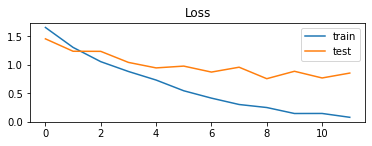

In [65]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

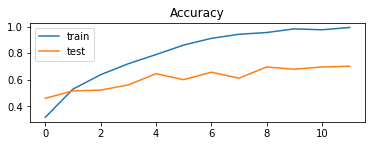

In [66]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [67]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 

In [68]:
for i in predictions:
    print(i)
    

[0.01314437 0.05679075 0.19847332 0.00667251 0.5512018  0.17371716]
[0.06196884 0.07978073 0.01818395 0.00108417 0.03687316 0.8021091 ]
[0.00598251 0.7305871  0.00970377 0.05633043 0.12070742 0.07668866]
[8.3321905e-01 3.2874674e-04 1.2821122e-01 6.2513570e-03 2.4844633e-02
 7.1448828e-03]
[9.8226005e-01 1.6762463e-04 5.6497161e-03 1.0452070e-02 1.1838829e-03
 2.8667500e-04]
[0.00680013 0.04513531 0.02795506 0.02737324 0.82288045 0.06985579]
[8.6660851e-03 7.5700884e-03 9.1744602e-01 6.3033879e-04 4.2235306e-03
 6.1463997e-02]
[0.00245465 0.89147663 0.02028872 0.00223473 0.01318575 0.07035951]
[3.6945483e-03 1.6314968e-03 9.6995431e-01 2.0297781e-04 1.6752698e-03
 2.2841506e-02]
[1.3267642e-01 4.7973078e-03 8.4058625e-01 6.9816125e-04 1.2131784e-02
 9.1100521e-03]
[1.95127074e-02 1.67268724e-03 9.58222806e-01 1.94031876e-04
 6.63747173e-03 1.37602985e-02]
[2.4142840e-03 1.0142360e-03 9.8757035e-01 8.9192741e-05 1.4286662e-03
 7.4834018e-03]
[0.05500232 0.01162683 0.00313718 0.07889042 

In [69]:
rounded_predictions = np.argmax(predictions, axis=1)

#for i in rounded_predictions:
   # print(i)

In [70]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [73]:
y_test

fe  hm  ij  mk  rg  rn
752    0   0   0   0   1   0
765    0   0   0   0   0   1
1656   0   1   0   0   0   0
1288   1   0   0   0   0   0
1102   1   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..
306    0   0   0   1   0   0
976    0   0   0   0   0   1
1882   0   0   0   0   0   1
1401   0   0   0   0   0   1
100    0   0   0   1   0   0

[198 rows x 6 columns]

In [72]:
for i in y_test:
    print(i)

fe
hm
ij
mk
rg
rn


In [74]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 0, 1], dtype=uint8)

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize

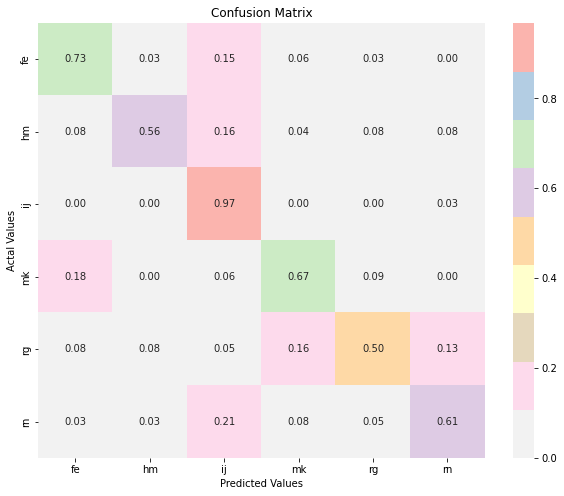

In [77]:
from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, model_prediction)
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [78]:
cm_plot_labels = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn']         

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

              precision    recall  f1-score   support

          fe       0.67      0.73      0.70        33
          hm       0.74      0.56      0.64        25
          ij       0.59      0.97      0.73        31
          mk       0.65      0.67      0.66        33
          rg       0.70      0.50      0.58        38
          rn       0.74      0.61      0.67        38

    accuracy                           0.67       198
   macro avg       0.68      0.67      0.66       198
weighted avg       0.68      0.67      0.66       198

